# <span style="color:red">Malicious URL Classification</span>

# Gathering & processing dataset

In [1]:
import pandas as pd

db = pd.read_csv("Desktop\link_new3.csv")
#db.to_csv("E:\programs\python programs\ml basics\youtube_playlist1\minorP\link_new.csv",encoding="utf-8")
db.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust,domain_age
0,wen.com,1,7,1,0,7,0,com,0,1,860073,885413,- (-),2,8402
1,binarygroup.com,1,15,1,0,15,0,com,0,1,13000000,13000000,- (-),2,8401
2,broker.com,1,10,1,0,10,0,com,0,1,13000000,13000000,- (-),2,9130
3,crypto.com,1,10,1,0,10,0,com,0,1,23478,21573,United States (US),2,10958
4,538ly.cn,1,8,1,0,8,0,cn,0,0,13000000,13000000,- (-),6,0


In [11]:
db['label'] = 1

In [43]:
import numpy as np
label_dict2 = {np.NaN : 0,0:0, 1 : 1}

db['label'] = db['label'].map(label_dict2)

db.head()

,label
url,
wen.com,1
binarygroup.com,1
broker.com,1
crypto.com,1
538ly.cn,1


In [2]:
db.tail()

,url,label
12584,https://www.tonymendez.blogspot.com/,0
12585,https://www.tonypeach.pwp.blueyonder.co.uk/Can...,0
12586,https://www.top-topics.thefullwiki.org/1888_de...,0
12587,https://www.top-topics.thefullwiki.org/1890_de...,0
12588,https://www.top-topics.thefullwiki.org/1897_bi...,0


In [15]:
db['url'] = db['url'].map(lambda x: x.lstrip('127.0.0.1  '))

In [9]:
db.set_index("url", inplace = True)
db.to_csv("Desktop\link_new.csv")

In [46]:
(db.groupby('label').size()/db['label'].count())*100

label
0    38.478036
1    61.521964
dtype: float64

# Feature Extraction - Lexical

In [3]:
db['url_len'] = db['url'].str.len()

In [4]:
db['dotC'] = db['url'].str.count('\.')

In [5]:
#delimiters count
#delim_list = [';','_','?','=','&','-','/']
db['semicolC'] = db['url'].str.count(';')
db['underscoreC'] = db['url'].str.count('_')
db['quesC'] = db['url'].str.count('\?')
db['equalC'] = db['url'].str.count('=')
db['andC'] = db['url'].str.count('&')
db['dashC'] = db['url'].str.count('-')
db['dslashC'] = db['url'].str.count('//')
db['sslashC'] = db['url'].str.count('/')
db['sslashC'] = db['sslashC'] - db['dslashC']

delim_col = ['semicolC', 'underscoreC', 'quesC', 'equalC', 'andC','dashC','sslashC']
db['delimC'] = db[delim_col].sum(axis=1)
db = db.drop(['semicolC', 'underscoreC', 'quesC', 'equalC', 'andC','dashC','sslashC','dslashC'],axis=1)

# Feature Extraction - Domain based

In [20]:
from urllib.parse import urlparse

In [3]:
from tld import get_tld

def dom_len(url):
    try:
        res = get_tld(url,fix_protocol=True,as_object=True)
        l = len(res.parsed_url.netloc)
    except:
        l = 0
    return l

db['primDom_len']= db['url'].apply(dom_len)

In [21]:
def path_len(url):
    try:
        res = get_tld(url,fix_protocol=True,as_object=True)
        l = len(res.parsed_url.path)
    except:
        l = 0
    return l

db['path_len'] = db['url'].apply(path_len)

In [5]:
def tld_(url):
    try:
        res = get_tld(url,fix_protocol=True,as_object=True)
        l = res.tld
    except:
        l = "NA"
    return l

db['tld'] = db['url'].apply(tld_)

In [6]:
from tld import get_tld
shady_tld = ['country','kim','science','gq','work','ninja','xyz','date','faith','zip','racing','cricket','win','space','accountant','realtor','top','stream','christmas','gdn','mom','pro','men','review','party','link']

def shady(url):
    try:
        res = get_tld(url,fix_protocol=True,as_object=True)
        if res.tld in shady_tld:
            shady = 1
        else:
            shady = 0
    except:
        shady = 0
    return shady

db['shady_tld']= db['url'].apply(shady)

In [3]:
import whois
from datetime import datetime

In [17]:
whois.head()

,Domain,domain_age
0,wen.com,8402
1,binarygroup.com,8401
2,broker.com,9130
3,crypto.com,10958
4,538ly.cn,0


In [47]:
whois = whois.drop(['Length','Registrar','Date Created','Date Expires','Owner Name', 'Owner Address','Owner Email', 'Owner Phone', 'Nameserver', 'Web of Trust'],axis=1)
whois.head()

,Domain,domain_age
0,wen.com,8402
1,binarygroup.com,8401
2,broker.com,9130
3,crypto.com,10958
4,538ly.cn,0


In [46]:
from datetime import datetime
def get_age(url):
    try:
        x = datetime.strptime(url['Date Created'], "%d-%m-%Y")
        y = datetime.strptime(url['Date Expires'], " %Y-%m-%d")
        date_diffHours = (y-x).days
        
    except:
        date_diffHours = 0
    return round(date_diffHours,4)

#db['last_update']= db['url'].apply(get_update_age)
#whois['domain_age'] = db_short['Domain'].apply(get_age)
whois['domain_age']= whois.apply(get_age,axis=1)

In [6]:
x = datetime.strptime(whois['Date Created'][0], "%d-%m-%Y")
y = datetime.strptime(whois['Date Expires'][0], " %Y-%m-%d")
(y-x).days

8402

In [48]:
#whois['Date Created']= whois['Date Created'].astype(str)
#whois['Date Expires']= whois['Date Expires'].astype(str)
print(type(whois['Date Created']))
print(type(whois['Date Expires']))
print(type(whois['Date Created'][0]))
print((whois['Date Created'][0]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'str'>
17-03-1997


In [12]:
def get_whois(url):
    try:
        w = whois.whois(url)
        return pd.Series([w.expiration_date[0], w.creation_date[0]], index=["expiration_date", "creation_date"])
    except:
        return pd.Series([datetime.now(),datetime.now()],index=["expiration_date", "creation_date"])
    
dbst = db[:10]
dbst['url'].apply(get_whois)

,updated_date,expiration_date,creation_date,country
0,"[2018-02-14 10:25:12, 2018-02-14 02:25:12]","[2020-03-18 04:00:00, 2020-03-17 00:00:00]","[1997-03-17 05:00:00, 1997-03-16 21:00:00]",US
1,"[2019-10-03 14:48:25, 2019-10-03 14:48:23]",2022-10-04 03:28:05,1999-10-04 03:28:05,US
2,"[2019-05-03 18:29:11, 2018-07-05 04:22:56]",2021-09-15 04:00:00,1996-09-16 04:00:00,US
3,"[2018-06-02 08:35:18, 2019-11-15 09:13:26]",2023-05-07 04:00:00,1993-05-06 04:00:00,US
4,2019-11-16 03:18:18.736796,2019-11-16 03:18:18.736796,2019-11-16 03:18:18.736796,NA
5,2019-11-16 03:18:19.114528,2019-11-16 03:18:19.114528,2019-11-16 03:18:19.114528,NA
6,2019-11-16 03:18:19.651304,2019-11-16 03:18:19.651304,2019-11-16 03:18:19.651304,NA
7,"[2015-10-22 10:21:24, 2014-07-17 15:34:55]",2024-07-17 11:59:59,2003-09-11 18:15:30,US
8,"[2019-03-05 08:31:10, 2019-03-12 15:45:24]",2020-03-04 19:13:24,2004-03-04 19:13:24,NO
9,"[2019-10-05 13:48:06, 2016-06-22 09:47:58]",2022-10-31 10:34:25,2000-10-31 11:34:25,US


In [42]:
whois = pd.read_csv("Downloads/whois_com.csv")
whois = whois.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
whois.head()

,Length,Domain,Registrar,Date Created,Date Expires,Owner Name,Owner Address,Owner Email,Owner Phone,Nameserver,Web of Trust
0,3,wen.com,MarkMonitor Inc.,17-03-1997,2020-03-18,NaN,NaN,NaN,;,pdns214.ultradns.biz ; pdns214.ultradns.com ; ...,Good
1,11,binarygroup.com,"GoDaddy.com, LLC",04-10-1999,2022-10-04,NaN,NaN,NaN,;,ns57.domaincontrol.com ; ns58.domaincontrol.co...,Good
2,6,broker.com,"GoDaddy.com, LLC",16-09-1996,2021-09-15,NaN,NaN,NaN,;,ns1.eftydns.com ; ns2.eftydns.com ;,Good
3,6,crypto.com,"Network Solutions, LLC",06-05-1993,2023-05-07,NaN,NaN,NaN,;,chad.ns.cloudflare.com ; sima.ns.cloudflare.co...,Good
4,5,538ly.cn,Available,-,-,-,-,-,-,-,Not enough ratings


In [8]:
import socket
from tld import get_tld

def get_remote_IP(url):
    try:
        res = get_tld(url,fix_protocol=True,as_object=True)
        l = res.parsed_url.netloc
        ip = socket.gethostbyname(l)
        ipPresent = 1
    except:
        ipPresent = 0
    return ipPresent

db_short2 = db[10000:]
db_short2['IP_present']= db_short2['url'].apply(get_remote_IP)       

C:\Users\Dell\Anaconda3\envs\mal_url\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [9]:
db.to_csv("Desktop/db10000+.csv")

In [45]:
db_domain = db
db_domain['domain'] = db_domain['url'].apply(fld_)
db_domain.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust,domain
0,wen.com,1,7,1,0,7,0,com,0,1,860073,885413,- (-),2,wen.com
1,binarygroup.com,1,15,1,0,15,0,com,0,1,13000000,13000000,- (-),2,binarygroup.com
2,broker.com,1,10,1,0,10,0,com,0,1,13000000,13000000,- (-),2,broker.com
3,crypto.com,1,10,1,0,10,0,com,0,1,23478,21573,United States (US),2,crypto.com
4,538ly.cn,1,8,1,0,8,0,cn,0,0,13000000,13000000,- (-),6,538ly.cn


In [48]:
db_domain = pd.merge(db_domain, whois, left_on='domain', right_on='Domain', how='left')
#db_domain = db_domain.drop(['Length', 'Domain','domain', 'Registrar', 'Date Created', 'Date Expires', 'Owner Name', 'Owner Address', 'Owner Email', 'Owner Phone', 'Nameserver'],axis=1)
db_domain.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust,domain,Domain,domain_age
0,wen.com,1,7,1,0,7,0,com,0,1,860073,885413,- (-),2,wen.com,wen.com,8402.0
1,binarygroup.com,1,15,1,0,15,0,com,0,1,13000000,13000000,- (-),2,binarygroup.com,binarygroup.com,8401.0
2,broker.com,1,10,1,0,10,0,com,0,1,13000000,13000000,- (-),2,broker.com,broker.com,9130.0
3,crypto.com,1,10,1,0,10,0,com,0,1,23478,21573,United States (US),2,crypto.com,crypto.com,10958.0
4,538ly.cn,1,8,1,0,8,0,cn,0,0,13000000,13000000,- (-),6,538ly.cn,538ly.cn,0.0


In [49]:
db_domain = db_domain.drop(['domain','Domain'],axis=1)
db_domain.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust,domain_age
0,wen.com,1,7,1,0,7,0,com,0,1,860073,885413,- (-),2,8402.0
1,binarygroup.com,1,15,1,0,15,0,com,0,1,13000000,13000000,- (-),2,8401.0
2,broker.com,1,10,1,0,10,0,com,0,1,13000000,13000000,- (-),2,9130.0
3,crypto.com,1,10,1,0,10,0,com,0,1,23478,21573,United States (US),2,10958.0
4,538ly.cn,1,8,1,0,8,0,cn,0,0,13000000,13000000,- (-),6,0.0


In [53]:
df = pd.read_csv('Desktop/link_new3.csv')
df=df.drop_duplicates(subset='url', keep="first")
df.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust,domain_age
0,wen.com,1,7,1,0,7,0,com,0,1,860073,885413,- (-),2,8402.0
1,binarygroup.com,1,15,1,0,15,0,com,0,1,13000000,13000000,- (-),2,8401.0
2,broker.com,1,10,1,0,10,0,com,0,1,13000000,13000000,- (-),2,9130.0
3,crypto.com,1,10,1,0,10,0,com,0,1,23478,21573,United States (US),2,10958.0
4,538ly.cn,1,8,1,0,8,0,cn,0,0,13000000,13000000,- (-),6,0.0


In [54]:
df.shape

(12589, 15)

In [55]:
df.set_index("url", inplace = True)
df.to_csv('Desktop/link_new3.csv')

# Features extraction - Rank based

In [8]:
import pandas as pd

alexa = pd.read_csv("Downloads/alexa_rank_domain.csv")
alexa.head()

,Domain,Length,Global Rank,Reach,3 Month Change,Country,Country Rank,Web of Trust
0,wen.com,3.0,860073.0,885413.0,-129185.0,- (-),-,Good
1,binarygroup.com,11.0,0.0,NaN,NaN,- (-),-,Good
2,broker.com,6.0,0.0,NaN,NaN,- (-),-,Good
3,crypto.com,6.0,23478.0,21573.0,-11000.0,United States (US),27504,Good
4,538ly.cn,5.0,0.0,NaN,NaN,- (-),-,Not enough ratings


In [10]:
from tld import get_tld 
def fld_(url):
    try:
        res = get_tld(url,fix_protocol=True,as_object=True)
        l = res.fld
    except:
        l = "NA"
    return l

In [25]:
db_domain = db
db_domain['domain'] = db_domain['url'].apply(fld_)
db_domain.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,domain
0,wen.com,1,7,1,0,7,0,com,0,1,wen.com
1,binarygroup.com,1,15,1,0,15,0,com,0,1,binarygroup.com
2,broker.com,1,10,1,0,10,0,com,0,1,broker.com
3,crypto.com,1,10,1,0,10,0,com,0,1,crypto.com
4,538ly.cn,1,8,1,0,8,0,cn,0,0,538ly.cn


In [26]:
db_domain.tail()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,domain
12584,https://www.tonymendez.blogspot.com/,0,36,3,2,27,1,blogspot.com,0,1,tonymendez.blogspot.com
12585,https://www.tonypeach.pwp.blueyonder.co.uk/Can...,0,56,6,2,34,14,co.uk,0,1,blueyonder.co.uk
12586,https://www.top-topics.thefullwiki.org/1888_de...,0,50,3,4,30,12,org,0,0,thefullwiki.org
12587,https://www.top-topics.thefullwiki.org/1890_de...,0,50,3,4,30,12,org,0,0,thefullwiki.org
12588,https://www.top-topics.thefullwiki.org/1897_bi...,0,50,3,4,30,12,org,0,0,thefullwiki.org


In [27]:
db_domain = pd.merge(db_domain, alexa, left_on='domain', right_on='Domain', how='left')
db_domain.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,domain,Domain,Length,Global Rank,Reach,3 Month Change,Country,Country Rank,Web of Trust
0,wen.com,1,7,1,0,7,0,com,0,1,wen.com,wen.com,3.0,860073.0,885413.0,-129185.0,- (-),-,Good
1,binarygroup.com,1,15,1,0,15,0,com,0,1,binarygroup.com,binarygroup.com,11.0,0.0,NaN,NaN,- (-),-,Good
2,broker.com,1,10,1,0,10,0,com,0,1,broker.com,broker.com,6.0,0.0,NaN,NaN,- (-),-,Good
3,crypto.com,1,10,1,0,10,0,com,0,1,crypto.com,crypto.com,6.0,23478.0,21573.0,-11000.0,United States (US),27504,Good
4,538ly.cn,1,8,1,0,8,0,cn,0,0,538ly.cn,538ly.cn,5.0,0.0,NaN,NaN,- (-),-,Not enough ratings


In [28]:
db_domain.tail()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,domain,Domain,Length,Global Rank,Reach,3 Month Change,Country,Country Rank,Web of Trust
48894,https://www.top-topics.thefullwiki.org/1890_de...,0,50,3,4,30,12,org,0,0,thefullwiki.org,thefullwiki.org,11.0,158142.0,133404.0,29933.0,United States (US),164524,Excellent
48895,https://www.top-topics.thefullwiki.org/1897_bi...,0,50,3,4,30,12,org,0,0,thefullwiki.org,thefullwiki.org,11.0,158142.0,133404.0,29933.0,United States (US),164524,Excellent
48896,https://www.top-topics.thefullwiki.org/1897_bi...,0,50,3,4,30,12,org,0,0,thefullwiki.org,thefullwiki.org,11.0,158142.0,133404.0,29933.0,United States (US),164524,Excellent
48897,https://www.top-topics.thefullwiki.org/1897_bi...,0,50,3,4,30,12,org,0,0,thefullwiki.org,thefullwiki.org,11.0,158142.0,133404.0,29933.0,United States (US),164524,Excellent
48898,https://www.top-topics.thefullwiki.org/1897_bi...,0,50,3,4,30,12,org,0,0,thefullwiki.org,thefullwiki.org,11.0,158142.0,133404.0,29933.0,United States (US),164524,Excellent


In [29]:
db_domain = db_domain.drop(['Length', 'Domain','domain','3 Month Change','Country Rank'],axis=1)

In [30]:
db_domain.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust
0,wen.com,1,7,1,0,7,0,com,0,1,860073.0,885413.0,- (-),Good
1,binarygroup.com,1,15,1,0,15,0,com,0,1,0.0,NaN,- (-),Good
2,broker.com,1,10,1,0,10,0,com,0,1,0.0,NaN,- (-),Good
3,crypto.com,1,10,1,0,10,0,com,0,1,23478.0,21573.0,United States (US),Good
4,538ly.cn,1,8,1,0,8,0,cn,0,0,0.0,NaN,- (-),Not enough ratings


In [32]:
db_domain['Global Rank'].max()

12233437.0

In [34]:
import numpy as np
db_domain['Global Rank'] = db_domain['Global Rank'].replace(0,13000000)
db_domain.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust
0,wen.com,1,7,1,0,7,0,com,0,1,860073.0,885413.0,- (-),Good
1,binarygroup.com,1,15,1,0,15,0,com,0,1,13000000.0,NaN,- (-),Good
2,broker.com,1,10,1,0,10,0,com,0,1,13000000.0,NaN,- (-),Good
3,crypto.com,1,10,1,0,10,0,com,0,1,23478.0,21573.0,United States (US),Good
4,538ly.cn,1,8,1,0,8,0,cn,0,0,13000000.0,NaN,- (-),Not enough ratings


In [35]:
db_domain['Reach'].max()

12231075.0

In [36]:
db_domain['Reach'] = db_domain['Reach'].replace(np.NaN,13000000)
db_domain.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust
0,wen.com,1,7,1,0,7,0,com,0,1,860073.0,885413.0,- (-),Good
1,binarygroup.com,1,15,1,0,15,0,com,0,1,13000000.0,13000000.0,- (-),Good
2,broker.com,1,10,1,0,10,0,com,0,1,13000000.0,13000000.0,- (-),Good
3,crypto.com,1,10,1,0,10,0,com,0,1,23478.0,21573.0,United States (US),Good
4,538ly.cn,1,8,1,0,8,0,cn,0,0,13000000.0,13000000.0,- (-),Not enough ratings


In [37]:
db_domain['Web of Trust'].unique()

array(['Good', 'Not enough ratings', 'Excellent', 'Very poor',
       'Unsatisfactory', 'Poor', nan], dtype=object)

In [38]:
wot_dict = {'Good':2, 'Not enough ratings':6, 'Excellent':1, 'Very poor':5,'Unsatisfactory':3,'Poor':4, np.NaN :7}

db_domain['Web of Trust'] = db_domain['Web of Trust'].map(wot_dict)

db_domain.head()

,url,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust
0,wen.com,1,7,1,0,7,0,com,0,1,860073.0,885413.0,- (-),2
1,binarygroup.com,1,15,1,0,15,0,com,0,1,13000000.0,13000000.0,- (-),2
2,broker.com,1,10,1,0,10,0,com,0,1,13000000.0,13000000.0,- (-),2
3,crypto.com,1,10,1,0,10,0,com,0,1,23478.0,21573.0,United States (US),2
4,538ly.cn,1,8,1,0,8,0,cn,0,0,13000000.0,13000000.0,- (-),6


In [4]:
db['Country'] = db['Country'].replace(" ","- (-)")
db.head()

,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust
url,,,,,,,,,,,,,
wen.com,1,7,1,0,7,0,com,0,1,860073.0,885413.0,- (-),2
binarygroup.com,1,15,1,0,15,0,com,0,1,13000000.0,13000000.0,- (-),2
broker.com,1,10,1,0,10,0,com,0,1,13000000.0,13000000.0,- (-),2
crypto.com,1,10,1,0,10,0,com,0,1,23478.0,21573.0,United States (US),2
538ly.cn,1,8,1,0,8,0,cn,0,0,13000000.0,13000000.0,- (-),6


In [15]:
#db['alexa_rank'] = db['alexa_rank'].replace(np.NaN,1000000)
#db.head()
#db_domain.set_index("url", inplace = True)
#db_domain.to_csv("Desktop\link_new2.csv")
db.set_index("url", inplace = True)
db.to_csv("Desktop\link_new2.csv")

In [95]:
(db.groupby('label').size()/db['label'].count())*100

label
0    38.478036
1    61.521964
dtype: float64

# <span style="color:magenta">ML Model</span>

In [2]:
import sklearn
from sklearn import svm, preprocessing

In [6]:
import numpy as np
from sklearn.model_selection import cross_validate

X = np.array(db.drop(['url','label','tld','Country','Reach'],1))
X = preprocessing.scale(X)
y = np.array(db['label'])

X_train, X_test, y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.3)

In [8]:
clf= neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Model accuracy = ', accuracy*100)

Model accuracy =  95.73735769128938


In [10]:
clf= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Model accuracy = ', accuracy*100)

Model accuracy =  97.96134498279058


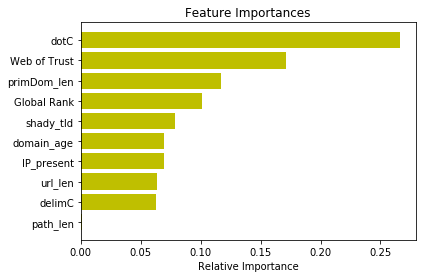

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ["IP_present","url_len","dotC","delimC","primDom_len","path_len",'shady_tld','Global Rank','Web of Trust','domain_age']
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [43]:
import numpy as np
from sklearn.model_selection import cross_validate

X = np.array(db_domain.drop(['label','tld','Country'],1))
y = np.array(db_domain['label'])

X_train, X_test, y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.3)

In [44]:
X

array([[7.00000e+00, 1.00000e+00, 0.00000e+00, ..., 8.60073e+05,
        8.85413e+05, 2.00000e+00],
       [1.50000e+01, 1.00000e+00, 0.00000e+00, ..., 1.30000e+07,
        1.30000e+07, 2.00000e+00],
       [1.00000e+01, 1.00000e+00, 0.00000e+00, ..., 1.30000e+07,
        1.30000e+07, 2.00000e+00],
       ...,
       [5.00000e+01, 3.00000e+00, 4.00000e+00, ..., 1.58142e+05,
        1.33404e+05, 1.00000e+00],
       [5.00000e+01, 3.00000e+00, 4.00000e+00, ..., 1.58142e+05,
        1.33404e+05, 1.00000e+00],
       [5.00000e+01, 3.00000e+00, 4.00000e+00, ..., 1.58142e+05,
        1.33404e+05, 1.00000e+00]])

In [45]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [7]:
from sklearn import neighbors

In [47]:
clf= neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Model accuracy = ', accuracy*100)

Model accuracy =  98.43899113837765


In [9]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Model accuracy = ', accuracy*100)

Model accuracy =  99.55691888207225


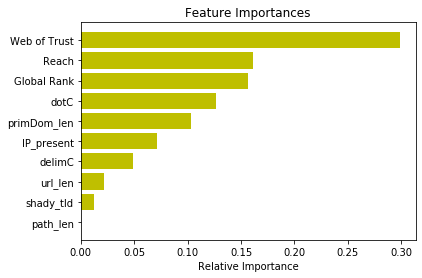

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ["IP_present","url_len","dotC","delimC","primDom_len","path_len",'shady_tld','Global Rank','Reach','Web of Trust']
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

C:\Users\Dell\Anaconda3\envs\mal_url\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


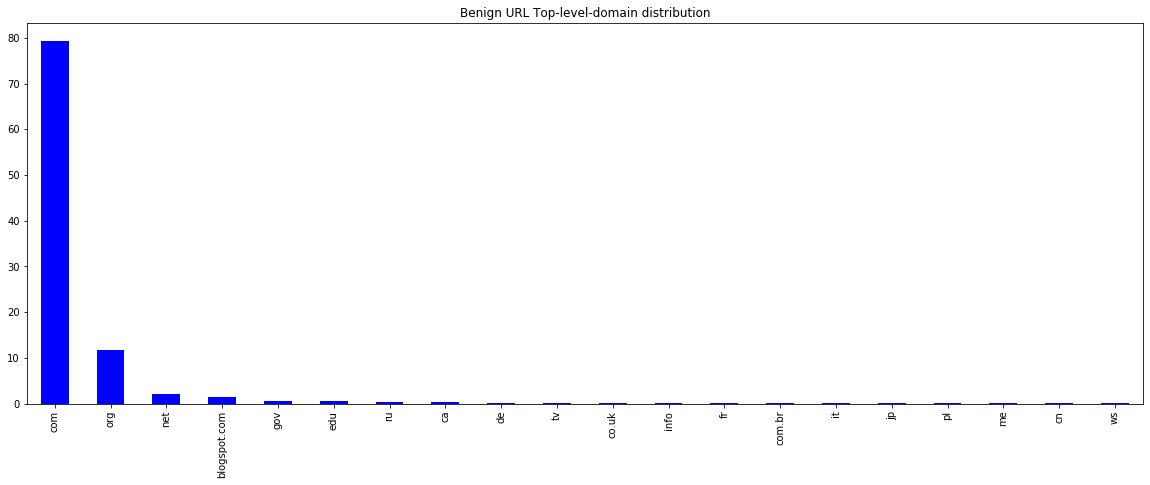

In [9]:
import matplotlib.pyplot as plt
grp = db.groupby('label')
ben = grp.get_group(0)
ben_tld = ben['tld']
ben_top_tld = (pd.Series(ben_tld).value_counts()/ben_tld.count())*100
ben_top_tld = ben_top_tld[:20]
ben_top_tld.plot('bar', figsize=(20,7),color='blue',title='Benign URL Top-level-domain distribution')
plt.show()

C:\Users\Dell\Anaconda3\envs\mal_url\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


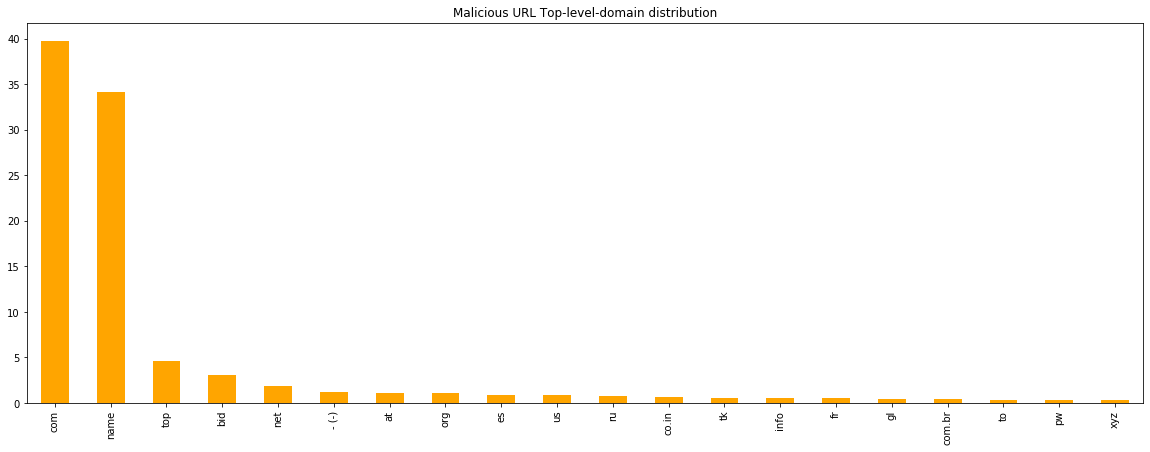

In [13]:
mal = grp.get_group(1)
mal_tld = mal['tld']
mal_top_tld = (pd.Series(mal_tld).value_counts()/mal_tld.count())*100
mal_top_tld = mal_top_tld[:20]
mal_top_tld.plot('bar', figsize=(20,7),color='orange',title='Malicious URL Top-level-domain distribution')
plt.show()

C:\Users\Dell\Anaconda3\envs\mal_url\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


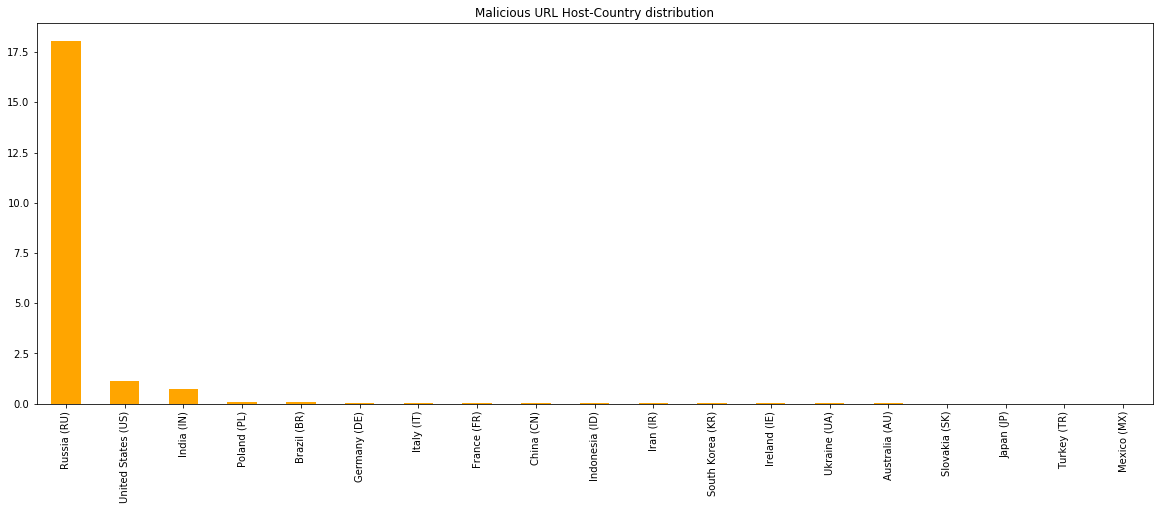

In [14]:
mal_country = mal['Country']
mal_top_ = (pd.Series(mal_country).value_counts()/mal_country.count())*100
mal_top_ = mal_top_[1:20]
mal_top_.plot('bar', figsize=(20,7),color='orange',title='Malicious URL Host-Country distribution')
plt.show()

C:\Users\Dell\Anaconda3\envs\mal_url\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


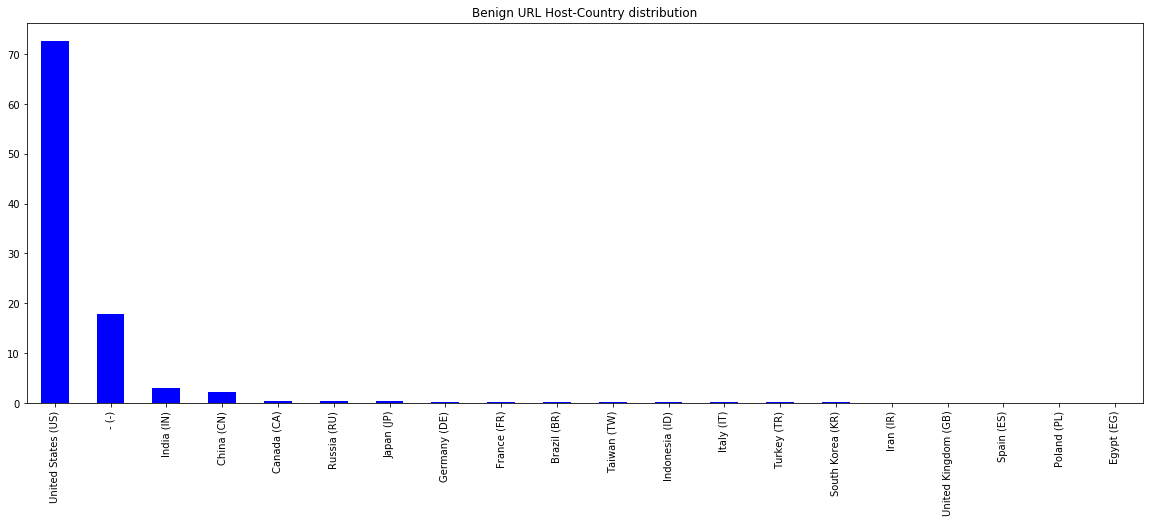

In [25]:
ben_country = ben['Country']
ben_top_ = (pd.Series(ben_country).value_counts()/ben_country.count())*100
ben_top_ = ben_top_[:20]
ben_top_.plot('bar', figsize=(20,7),color='blue',title='Benign URL Host-Country distribution')
plt.show()

In [56]:
db = pd.read_csv('Desktop/link_new3.csv',index_col=0)
db.head()

,label,url_len,dotC,delimC,primDom_len,path_len,tld,shady_tld,IP_present,Global Rank,Reach,Country,Web of Trust,domain_age
url,,,,,,,,,,,,,,
wen.com,1,7,1,0,7,0,com,0,1,860073,885413,- (-),2,8402
binarygroup.com,1,15,1,0,15,0,com,0,1,13000000,13000000,- (-),2,8401
broker.com,1,10,1,0,10,0,com,0,1,13000000,13000000,- (-),2,9130
crypto.com,1,10,1,0,10,0,com,0,1,23478,21573,United States (US),2,10958
538ly.cn,1,8,1,0,8,0,cn,0,0,13000000,13000000,- (-),6,0


In [25]:
import sklearn
from sklearn import svm, preprocessing

In [70]:
df=pd.read_csv('Desktop/link_new3.csv', index_col=0)

In [83]:
import numpy as np
from sklearn.model_selection import cross_validate

X = np.array(df.drop(['label','tld','Country'],1))
y = np.array(df['label'])

X_train, X_test, y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.3)

In [84]:
X.shape

(12589, 11)

In [85]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [86]:
from sklearn import neighbors

In [87]:
clf= neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Model accuracy = ', accuracy*100)

Model accuracy =  92.13661636219221


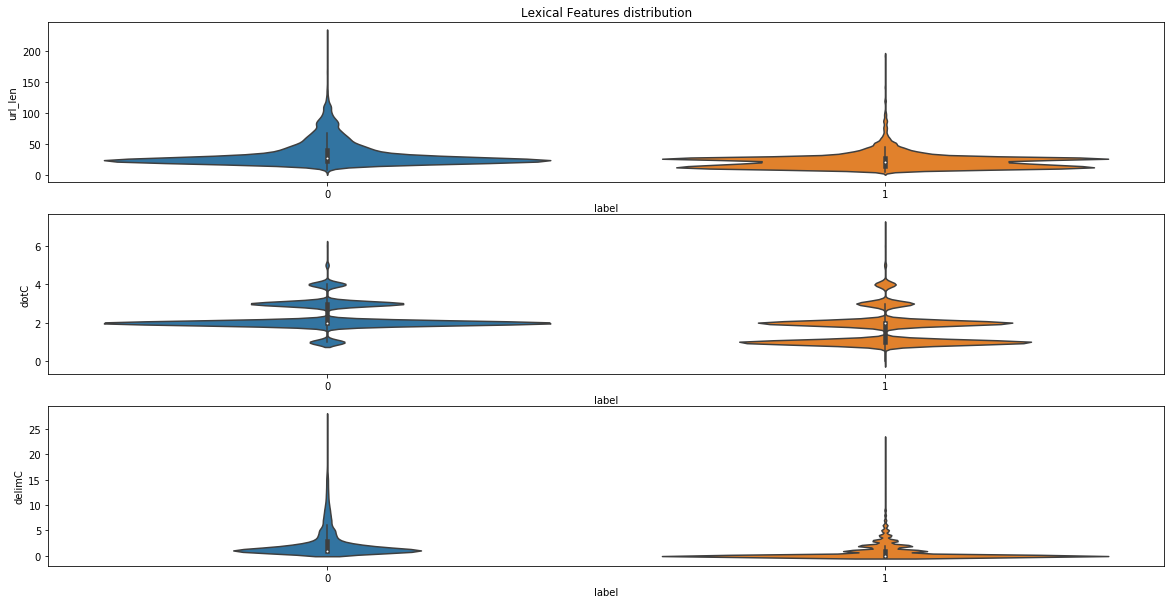

In [91]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.title("Lexical Features distribution")
sns.violinplot(x='label',y='url_len',data=df)
plt.subplot(3,1,2)
sns.violinplot(x='label',y='dotC',data=df)
plt.subplot(3,1,3)
sns.violinplot(x='label',y='delimC',data=df)

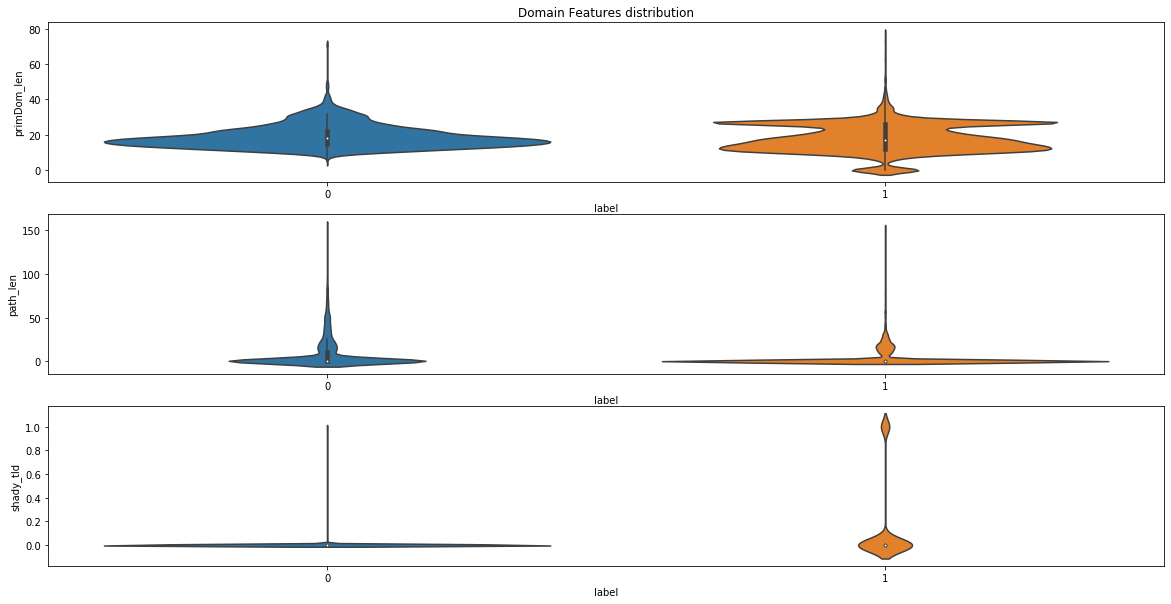

In [92]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.title("Domain Features distribution")
sns.violinplot(x='label',y='primDom_len',data=df)
plt.subplot(3,1,2)
sns.violinplot(x='label',y='path_len',data=df)
plt.subplot(3,1,3)
sns.violinplot(x='label',y='shady_tld',data=df)

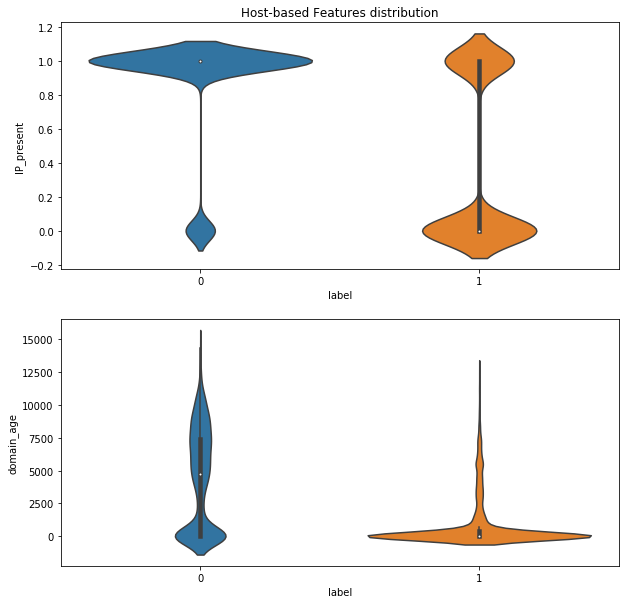

In [93]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Host-based Features distribution")
sns.violinplot(x='label',y='IP_present',data=df)
plt.subplot(2,1,2)
sns.violinplot(x='label',y='domain_age',data=df)

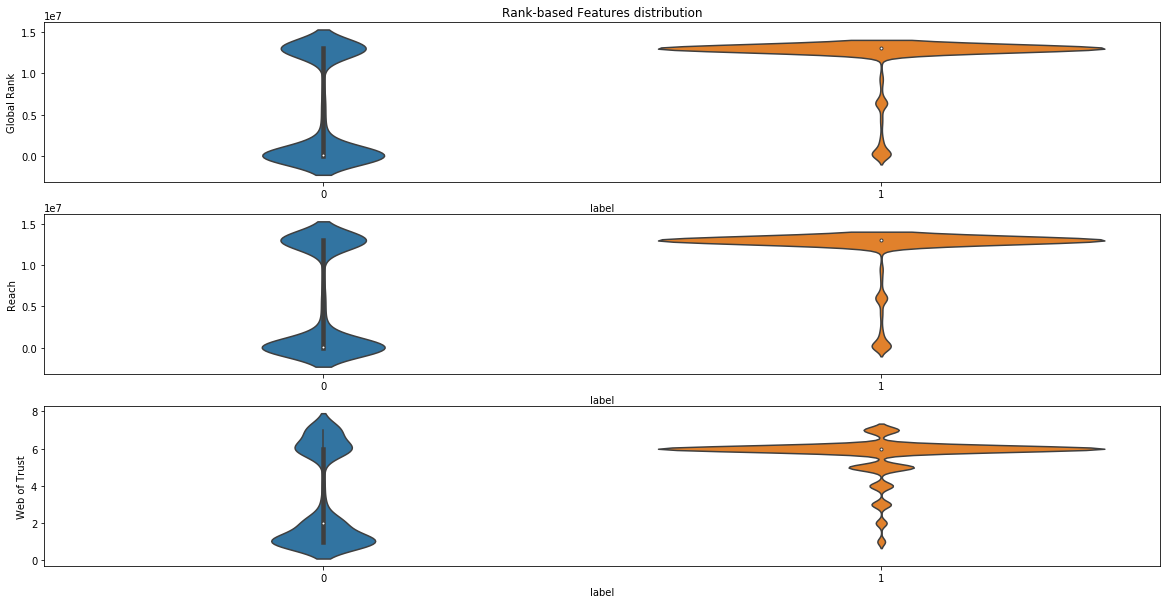

In [94]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.title("Rank-based Features distribution")
sns.violinplot(x='label',y='Global Rank',data=df)
plt.subplot(3,1,2)
sns.violinplot(x='label',y='Reach',data=df)
plt.subplot(3,1,3)
sns.violinplot(x='label',y='Web of Trust',data=df)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Model accuracy = ', accuracy*100)

Model accuracy =  97.45830023828435


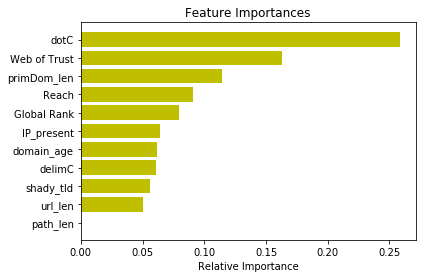

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ["IP_present","url_len","dotC","delimC","primDom_len","path_len",'shady_tld','Global Rank','Reach','Web of Trust','domain_age']
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

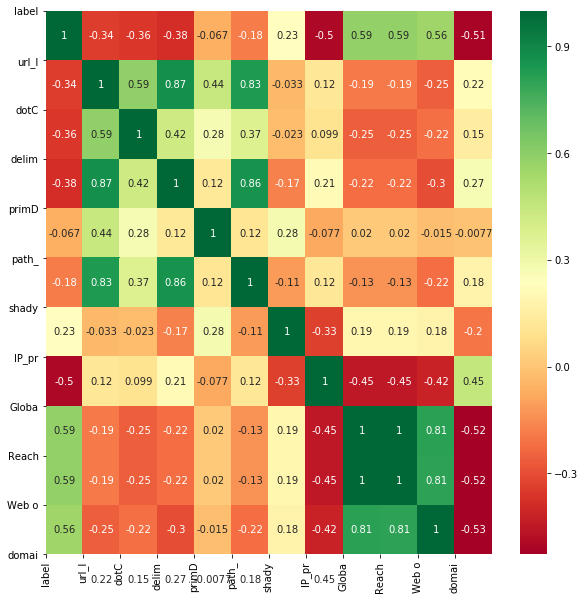

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
feature_corr = db.drop(['tld','Country'],1).corr()
labels = [c[:5] for c in feature_corr.columns]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax = sns.heatmap(feature_corr,annot=True,cmap="RdYlGn")
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()